In [1]:
import pandas as pd
import numpy as np

# 거리 계산 패키지
import pyproj
from haversine import haversine

# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# 한글 폰트 적용
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
# 7개의 데이터 불러오기
data1 =  pd.read_excel('C:/Users/sgvin/Desktop/개인2/대학/동아리/경진대회/2022 동계 경진대회/데이터셋/03_11_01_P.xlsx')
data2 =  pd.read_excel('C:/Users/sgvin/Desktop/개인2/대학/동아리/경진대회/2022 동계 경진대회/데이터셋/03_11_02_P.xlsx')
data3 =  pd.read_excel('C:/Users/sgvin/Desktop/개인2/대학/동아리/경진대회/2022 동계 경진대회/데이터셋/03_11_03_P.xlsx')
data4 =  pd.read_excel('C:/Users/sgvin/Desktop/개인2/대학/동아리/경진대회/2022 동계 경진대회/데이터셋/03_11_04_P.xlsx')
data5 =  pd.read_excel('C:/Users/sgvin/Desktop/개인2/대학/동아리/경진대회/2022 동계 경진대회/데이터셋/03_11_05_P.xlsx')
data6 =  pd.read_excel('C:/Users/sgvin/Desktop/개인2/대학/동아리/경진대회/2022 동계 경진대회/데이터셋/03_11_06_P.xlsx')
data7 =  pd.read_excel('C:/Users/sgvin/Desktop/개인2/대학/동아리/경진대회/2022 동계 경진대회/데이터셋/03_11_07_P.xlsx')

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


# 데이터 탐색

In [4]:
# 7개의 데이터 형태 확인
print(data1.shape)
print(data2.shape)
print(data3.shape)
print(data4.shape)
print(data5.shape)
print(data6.shape)
print(data7.shape)

(3055, 64)
(869, 63)
(53992, 50)
(3524, 63)
(614, 63)
(1931, 63)
(3025, 63)


In [5]:
# 데이터 통합을 위한 공통된 컬럼 확인 : 3가지 유형
print('data1', data1.columns)
print('data2', data2.columns)
print('data3', data3.columns)

data1 Index(['번호', '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호',
       '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(X)', '좌표정보(Y)',
       '문화체육업종명', '문화사업자구분명', '지역구분명', '총층수', '주변환경명', '제작취급품목내용', '보험기관명',
       '건물용도명', '지상층수', '지하층수', '객실수', '건축연면적', '영문상호명', '영문상호주소', '선박총톤수',
       '선박척수', '선박제원', '무대면적', '좌석수', '기념품종류', '회의실별동시수용인원', '시설면적', '놀이기구수내역',
       '놀이시설수', '방송시설유무', '발전시설유무', '의무실유무', '안내소유무', '기획여행보험시작일자',
       '기획여행보험종료일자', '자본금', '보험시작일자', '보험종료일자', '부대시설내역', '시설규모', '관광숙박업상세명'],
      dtype='object')
data2 Index(['번호', '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호',
       '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자'

In [6]:
# 결측치 확인
data1.isnull().sum()[data1.isnull().sum() != 0]

인허가취소일자       3031
폐업일자          2557
휴업시작일자        2943
휴업종료일자        2943
재개업일자         3055
소재지전화          991
소재지면적         3055
소재지우편번호       1942
도로명전체주소        133
도로명우편번호        788
업태구분명         3055
좌표정보(X)         99
좌표정보(Y)         99
문화사업자구분명      2283
지역구분명          888
총층수            434
주변환경명         1662
제작취급품목내용      3055
보험기관명         2727
건물용도명         1010
지상층수           352
지하층수           689
객실수            974
건축연면적         1500
영문상호명         2446
영문상호주소        2449
선박총톤수         2485
선박척수          2486
선박제원          3055
무대면적          2486
좌석수           2485
기념품종류         3055
회의실별동시수용인원    2481
시설면적           350
놀이기구수내역       3055
놀이시설수         2486
방송시설유무        3055
발전시설유무        3055
의무실유무         3055
안내소유무         3055
기획여행보험시작일자    3055
기획여행보험종료일자    3055
자본금           1299
보험시작일자        3049
보험종료일자        3049
부대시설내역        3055
시설규모           350
관광숙박업상세명       389
dtype: int64

In [7]:
# 영업상태명 확인
print(data1['영업상태명'].unique())
print(data2['영업상태명'].unique())
print(data3['영업상태명'].unique())
print(data4['영업상태명'].unique())
print(data5['영업상태명'].unique())
print(data6['영업상태명'].unique())
print(data7['영업상태명'].unique())

['영업/정상' '폐업' '휴업' '취소/말소/만료/정지/중지']
['취소/말소/만료/정지/중지' '영업/정상' '폐업' '휴업']
['폐업' '영업/정상']
['영업/정상' '폐업' '휴업' '취소/말소/만료/정지/중지']
['영업/정상' '폐업' '휴업' '취소/말소/만료/정지/중지']
['폐업' '영업/정상' '휴업' '취소/말소/만료/정지/중지']
['영업/정상' '폐업' '휴업' '취소/말소/만료/정지/중지']


In [8]:
# 상세영업상태명 확인: 영업상태명 하에 분류된 열이므로 삭제 가능하다고 판단
print(data1['상세영업상태명'].unique())
print(data2['상세영업상태명'].unique())
print(data3['상세영업상태명'].unique())
print(data4['상세영업상태명'].unique())
print(data5['상세영업상태명'].unique())
print(data6['상세영업상태명'].unique())
print(data7['상세영업상태명'].unique())

['영업중' '폐업' '휴업' '등록취소' '직권말소' '허가취소' '영업정지']
['지정취소' '영업중' '폐업' '휴업' '직권말소' '등록취소']
['폐업' '영업']
['영업중' '폐업' '휴업' '등록취소' '지정취소']
['영업중' '폐업' '휴업' '영업정지' '직권말소' '등록취소']
['폐업' '영업중' '휴업' '지정취소']
['영업중' '폐업' '휴업' '등록취소' '직권말소']


# 데이터 전처리

### data3의 컬럼명 변경 및 총층수 객실수 컬럼 추가

In [9]:
# 건물지상층수&건물지하층수 -> 지상층수&지하층수: 다른 데이터와 이름 맞춰주기
data3 = data3.rename(columns={'건물지상층수':'지상층수'})
data3 = data3.rename(columns={'건물지하층수':'지하층수'})

In [10]:
# 총층수 =  지상층수 + 지하층수
# 객실수 = 한실수 + 양실수
data3['총층수'] = data3['지상층수'] + data3['지하층수']
data3['객실수'] = data3['한실수'].fillna(0) + data3['양실수'].fillna(0)

In [11]:
# data3의 개방서비스명: 숙박업(ex.여인숙, 호텔) -> 객실 수가 0일 수 없음: 객실수 0인 경우 삭제
data3 = data3[data3['객실수'] != 0]

## 7개의 데이터 통합

In [12]:
df = pd.concat([data1,data2,data3,data4,data5,data6,data7],axis=0)

In [13]:
# df 컬럼 확인
df.columns

Index(['번호', '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호',
       '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(X)', '좌표정보(Y)',
       '문화체육업종명', '문화사업자구분명', '지역구분명', '총층수', '주변환경명', '제작취급품목내용', '보험기관명',
       '건물용도명', '지상층수', '지하층수', '객실수', '건축연면적', '영문상호명', '영문상호주소', '선박총톤수',
       '선박척수', '선박제원', '무대면적', '좌석수', '기념품종류', '회의실별동시수용인원', '시설면적', '놀이기구수내역',
       '놀이시설수', '방송시설유무', '발전시설유무', '의무실유무', '안내소유무', '기획여행보험시작일자',
       '기획여행보험종료일자', '자본금', '보험시작일자', '보험종료일자', '부대시설내역', '시설규모', '관광숙박업상세명',
       '위생업태명', '사용시작지상층', '사용끝지상층', '사용시작지하층', '사용끝지하층', '한실수', '양실수', '욕실수',
       '발한실여부', '조건부허가신고사유', '조건부허가시작일자', '조건부허가종료일자', '건물소유구분명', '세탁기수',
       '여성종사자수', '남성종사자수', '회수건조수', '침대수', '다중이용업소여부'],
      dtype='object')

In [14]:
# df의 결측치 확인
df.isnull().sum()[df.isnull().sum() != 0]

인허가취소일자     63694
폐업일자        39436
휴업시작일자      63458
휴업종료일자      63095
재개업일자       63803
            ...  
여성종사자수      52938
남성종사자수      52950
회수건조수       27802
침대수         27858
다중이용업소여부    13018
Length: 69, dtype: int64

## df에서 7개 데이터의 공통된 컬럼만 남기고 삭제

In [15]:
df_1 = df[['번호', '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '시설규모', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호',
       '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(X)', '좌표정보(Y)', '총층수',
       '지상층수', '지하층수', '객실수', '좌석수']]

In [16]:
df_1.head()

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),총층수,지상층수,지하층수,객실수,좌석수
0,1,관광숙박업,03_11_01_P,3000000,CDFI2260032020000001,20201023,NaN,1,영업/정상,13,...,U,2021-03-25 02:40:00.0,NaN,201643.277883,452339.843126,11.0,9.0,2.0,100.0,NaN
1,2,관광숙박업,03_11_01_P,3000000,CDFI2260032018000003,20180618,NaN,3,폐업,3,...,U,2020-10-18 02:40:00.0,NaN,199003.460155,452574.992954,5.0,5.0,NaN,8.0,NaN
2,3,관광숙박업,03_11_01_P,3000000,CDFI2260032019000003,20191029,NaN,1,영업/정상,13,...,U,2021-03-25 02:40:00.0,NaN,198988.983646,452223.097221,19.0,16.0,3.0,140.0,NaN
3,4,관광숙박업,03_11_01_P,3000000,CDFI2260032019000002,20191018,NaN,1,영업/정상,13,...,U,2021-03-25 02:40:00.0,NaN,200280.218940,452611.575937,15.0,13.0,2.0,54.0,NaN
4,5,관광숙박업,03_11_01_P,3000000,CDFI2260032019000001,20191002,NaN,1,영업/정상,13,...,U,2021-03-25 02:40:00.0,NaN,198498.918633,452473.403750,17.0,13.0,4.0,301.0,NaN


In [17]:
# df_1 형태확인
df_1.shape

(63803, 33)

In [18]:
# df_1의 결측치 확인
df_1.isnull().sum()[df_1.isnull().sum() != 0]

인허가취소일자    63694
폐업일자       39436
휴업시작일자     63458
휴업종료일자     63095
재개업일자      63803
소재지전화      13552
시설규모       53495
소재지우편번호    10407
소재지전체주소       75
도로명전체주소    13881
도로명우편번호    16746
업태구분명      13019
좌표정보(X)     3429
좌표정보(Y)     3429
총층수        14397
지상층수       11605
지하층수       16943
객실수         8190
좌석수        21166
dtype: int64

## 불필요한 열 삭제
- 같은 의미를 가진 열이나 데이터를 특정시키는 열 삭제

In [19]:
df_2 = df_1.drop(['좌석수', '재개업일자','번호', '개방서비스아이디', '개방자치단체코드', '관리번호', '상세영업상태명',
                  '상세영업상태코드', '소재지전화', '소재지우편번호', '도로명전체주소', '도로명우편번호', '사업장명',
                  '최종수정시점', '데이터갱신구분', '데이터갱신일자', '지하층수', '지상층수','업태구분명','시설규모',
                  '인허가취소일자'],axis = 1)

#### 객실수와 총층수, 소재지전체주소, 좌표정보(X) 결측치 제거 및 영업상태명이 영업/정상, 폐업, 휴업인 경우만 남김
- 좌표정보(X)가 결측치인 경우 좌표정보(Y) 또한 결측치이므로 좌표정보(X) 결측치만 삭제

In [20]:
df_2_1 = df_2[df_2['객실수'].notnull()]
df_2_1 = df_2_1[df_2_1['총층수'].notnull()]
df_2_1 = df_2_1[df_2_1['소재지전체주소'].notnull()]
df_2_1 = df_2_1[df_2_1['좌표정보(X)'].notnull()]
df_2_1 = df_2_1[df_2_1['영업상태명'] != '취소/말소/만료/정지/중지']

# 결측치 삭제 후 인덱스 재설정
df_2_1.reset_index(drop=True,inplace = True)

In [21]:
df_2_1.head()

,개방서비스명,인허가일자,영업상태구분코드,영업상태명,폐업일자,휴업시작일자,휴업종료일자,소재지전체주소,좌표정보(X),좌표정보(Y),총층수,객실수
0,관광숙박업,20201023,1,영업/정상,NaN,NaN,NaN,서울특별시 종로구 숭인동 217-19,201643.277883,452339.843126,11.0,100.0
1,관광숙박업,20180618,3,폐업,20201008.0,NaN,NaN,서울특별시 종로구 익선동 24,199003.460155,452574.992954,5.0,8.0
2,관광숙박업,20191029,1,영업/정상,NaN,NaN,NaN,서울특별시 종로구 낙원동 134-2,198988.983646,452223.097221,19.0,140.0
3,관광숙박업,20191018,1,영업/정상,NaN,NaN,NaN,서울특별시 종로구 이화동 105-2 glue hotel,200280.218940,452611.575937,15.0,54.0
4,관광숙박업,20191002,1,영업/정상,NaN,NaN,NaN,서울특별시 종로구 관훈동 155-2,198498.918633,452473.403750,17.0,301.0


## 좌표 정보에서 위도경도 추출
- pyproj 사용하여 좌표정보서 위도 경도 추출, 좌표정보(X),(Y) 삭제 후 위도 경도 추가

In [22]:
df1=df_2_1[['좌표정보(X)','좌표정보(Y)']]
df1=df1.dropna()

In [23]:
def project_array(coord, p1_type, p2_type):
    p1=pyproj.Proj(init=p1_type)
    p2=pyproj.Proj(init=p2_type)
    fx,fy=pyproj.transform(p1,p2, coord[:,0],coord[:,1])
    return np.dstack([fx,fy])[0]

In [24]:
coord=np.array(df1)
coord

array([[201643.27788272, 452339.84312565],
       [199003.46015545, 452574.99295403],
       [198988.98364622, 452223.09722107],
       ...,
       [145722.769211  , -26932.4457345 ],
       [149615.103624  , -20459.4319628 ],
       [130554.856204  , -31335.0712953 ]])

In [25]:
p1_type='epsg:2097'
p2_type='epsg:4326'

In [26]:
result=project_array(coord,p1_type,p2_type)
result

C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\sgvin\AppData\Local\Temp/ipykernel_31888/668960070.py:4: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  fx,fy=pyp

array([[127.01649963,  37.57334837],
       [126.98661668,  37.57546778],
       [126.98645332,  37.57229723],
       ...,
       [126.41547956,  33.2522315 ],
       [126.45688649,  33.31078044],
       [126.25305926,  33.21166964]])

In [27]:
df1['경도'] = result[:,0]
df1['위도'] = result[:,1]

In [28]:
df_2_2 = df1.drop(['좌표정보(X)','좌표정보(Y)'],axis=1)

In [29]:
df_2_1 = df_2_1.drop(columns=['좌표정보(X)','좌표정보(Y)'])

In [30]:
df_2_2 = pd.concat([df_2_1,df_2_2],axis=1)

In [31]:
df_2_2.head()

,개방서비스명,인허가일자,영업상태구분코드,영업상태명,폐업일자,휴업시작일자,휴업종료일자,소재지전체주소,총층수,객실수,경도,위도
0,관광숙박업,20201023,1,영업/정상,NaN,NaN,NaN,서울특별시 종로구 숭인동 217-19,11.0,100.0,127.016500,37.573348
1,관광숙박업,20180618,3,폐업,20201008.0,NaN,NaN,서울특별시 종로구 익선동 24,5.0,8.0,126.986617,37.575468
2,관광숙박업,20191029,1,영업/정상,NaN,NaN,NaN,서울특별시 종로구 낙원동 134-2,19.0,140.0,126.986453,37.572297
3,관광숙박업,20191018,1,영업/정상,NaN,NaN,NaN,서울특별시 종로구 이화동 105-2 glue hotel,15.0,54.0,127.001070,37.575798
4,관광숙박업,20191002,1,영업/정상,NaN,NaN,NaN,서울특별시 종로구 관훈동 155-2,17.0,301.0,126.980905,37.574552


### 객실수 이상치 제거

In [33]:
def removeOutliers(x, column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    
    iqr = 3 * (q3 - q1) # 3* IQR(Q3 - Q1)
    
    y=x[(x[column] < (q3 + iqr)) & (x[column] > (q1 - iqr))]  # 이상치를 제거
    return(y)

In [34]:
df_2_2 = removeOutliers(df_2_2, '객실수')

In [35]:
df_2_2.isnull().sum()

개방서비스명          0
인허가일자           0
영업상태구분코드        0
영업상태명           0
폐업일자        31175
휴업시작일자      42628
휴업종료일자      42626
소재지전체주소         0
총층수             0
객실수             0
경도              0
위도              0
dtype: int64

## 소재지전체주소에서 시/도 추출

In [36]:
address = df_2_2['소재지전체주소'].apply(lambda x: str(x).split())
address

1                        [서울특별시, 종로구, 익선동, 24]
3        [서울특별시, 종로구, 이화동, 105-2, glue, hotel]
5            [서울특별시, 종로구, 관훈동, 198-11, 호텔, 썬비]
6                      [서울특별시, 종로구, 숭인동, 1405]
7                     [서울특별시, 종로구, 창신동, 444-9]
                         ...                  
44242         [제주특별자치도, 서귀포시, 안덕면, 동광리, 976번지]
44243              [제주특별자치도, 서귀포시, 보목동, 526번지]
44244             [제주특별자치도, 서귀포시, 중문동, 2232번지]
44245           [제주특별자치도, 서귀포시, 대포동, 산, 1-8번지]
44246         [제주특별자치도, 서귀포시, 대정읍, 하모리, 648-2]
Name: 소재지전체주소, Length: 42723, dtype: object

In [37]:
def address(x):
    for i in range(0,len(df_2_2)):
        return str(x).split()[i]

In [38]:
df_2_2['지역'] = df_2_2['소재지전체주소'].apply(address)

C:\Users\sgvin\AppData\Local\Temp/ipykernel_31888/1295009749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_2['지역'] = df_2_2['소재지전체주소'].apply(address)


In [39]:
df_2_2 = df_2_2.drop(['소재지전체주소'], axis=1)

In [40]:
df_2_2['지역'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도',
       '제주특별자치도', '세종특별자치시'], dtype=object)

In [41]:
df_2_2.reset_index(drop=True,inplace = True)

## 가장 가까운 KTX정차역과의 거리 s_distance 생성
- KTX정차역 이름과 주소를 수집하여 station 엑셀 파일 생성 후 지오코딩으로 위치좌표 생성
- haversine 패키지를 사용하여 모든 역과의 거리를 구한 후 가장 짧은 거리를 s_distance로 생성해줌

In [42]:
station =  pd.read_excel('C:/Users/sgvin/Desktop/개인2/대학/동아리/경진대회/2022 동계 경진대회/데이터셋/station.xlsx')

In [43]:
station.shape

(57, 7)

In [44]:
station.isnull().sum()

Unnamed: 0    0
번호            0
역명            0
노선            0
주소            0
X             0
Y             0
dtype: int64

In [45]:
print(station['X'][0])
print(df_2_2['경도'][1])

126.9710639
127.0010699505932


In [46]:
newnew = []
for i in range(0,len(df_2_2)):
    distance = []
    for j in range(0,len(station)):
        distance.append(haversine((station['X'][j], station['Y'][j]), (df_2_2['경도'][i], df_2_2['위도'][i])))
    s_distance = min(distance)
    newnew.append(s_distance)

In [49]:
newnew[:5]

[2.3178777184077264,
 3.6855982739623783,
 1.8333917517425162,
 3.2029465738447103,
 4.213350237432624]

In [46]:
df_2_2['s_distance'] = pd.DataFrame(newnew)

In [47]:
df_2_2

,개방서비스명,인허가일자,영업상태구분코드,영업상태명,폐업일자,휴업시작일자,휴업종료일자,총층수,객실수,경도,위도,지역,s_distance
0,관광숙박업,20180618,3,폐업,20201008.0,NaN,NaN,5.0,8.0,126.986617,37.575468,서울특별시,2.317878
1,관광숙박업,20191018,1,영업/정상,NaN,NaN,NaN,15.0,54.0,127.001070,37.575798,서울특별시,3.685598
2,관광숙박업,20180705,1,영업/정상,NaN,NaN,NaN,10.0,42.0,126.981901,37.573053,서울특별시,1.833392
3,관광숙박업,20180214,1,영업/정상,NaN,NaN,NaN,14.0,61.0,127.019354,37.573846,서울특별시,3.202947
4,관광숙박업,20140508,1,영업/정상,NaN,NaN,NaN,5.0,10.0,127.007328,37.570651,서울특별시,4.213350
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42718,일반야영장업,20150625,1,영업/정상,NaN,NaN,NaN,0.0,0.0,126.334375,33.306181,제주특별자치도,98.233974
42719,일반야영장업,20150522,1,영업/정상,NaN,NaN,NaN,0.0,0.0,126.605475,33.240524,제주특별자치도,105.486503
42720,일반야영장업,20160509,1,영업/정상,NaN,NaN,NaN,0.0,0.0,126.415480,33.252231,제주특별자치도,101.743011
42721,일반야영장업,20150727,1,영업/정상,NaN,NaN,NaN,0.0,0.0,126.456886,33.310780,제주특별자치도,98.175725


In [48]:
df_2_2.to_excel('제주도처리전_final.xlsx')

#### 제주도에는 기차역이 존재하지 않으므로 엑셀에서 지역이 제주도에 해당하는 행의 역과의 거리를 0으로 입력

In [49]:
df_2_3 = pd.read_excel('제주도처리후_final.xlsx')

## 연도별 개폐업 현황을 파악하기 위하여 df2019 df2020 df2021 생성

- 인허가일자를 기준으로 코로나 이전(~2019)/ 2020년 / 2021년의 데이터프레임 생성
- 각 데이터프레임이 해당하는 기간에 정상 폐업 휴업인지 판별하여 각 년도에 따른 영업상태명 생성

In [50]:
df_2_3.isnull().sum()

Unnamed: 0        0
개방서비스명            0
인허가일자             0
영업상태구분코드          0
영업상태명             0
폐업일자          31175
휴업시작일자        42628
휴업종료일자        42626
총층수               0
객실수               0
경도                0
위도                0
지역                0
s_distance        0
dtype: int64

#### 폐업일자와 휴업일자, 휴업종료일자를 사용하여 연도별 영업상태명을 생성해주어야 하므로 해당 열들의 결측치를 100000로 채움

In [51]:
df_2_3 = df_2_3.fillna(100000)

In [52]:
df_2_3

,Unnamed: 0,개방서비스명,인허가일자,영업상태구분코드,영업상태명,폐업일자,휴업시작일자,휴업종료일자,총층수,객실수,경도,위도,지역,s_distance
0,0,관광숙박업,20180618,3,폐업,20201008.0,100000.0,100000.0,5,8,126.986617,37.575468,서울특별시,2.317878
1,1,관광숙박업,20191018,1,영업/정상,100000.0,100000.0,100000.0,15,54,127.001070,37.575798,서울특별시,3.685598
2,2,관광숙박업,20180705,1,영업/정상,100000.0,100000.0,100000.0,10,42,126.981901,37.573053,서울특별시,1.833392
3,3,관광숙박업,20180214,1,영업/정상,100000.0,100000.0,100000.0,14,61,127.019354,37.573846,서울특별시,3.202947
4,4,관광숙박업,20140508,1,영업/정상,100000.0,100000.0,100000.0,5,10,127.007328,37.570651,서울특별시,4.213350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42718,42718,일반야영장업,20150625,1,영업/정상,100000.0,100000.0,100000.0,0,0,126.334375,33.306181,제주특별자치도,0.000000
42719,42719,일반야영장업,20150522,1,영업/정상,100000.0,100000.0,100000.0,0,0,126.605475,33.240524,제주특별자치도,0.000000
42720,42720,일반야영장업,20160509,1,영업/정상,100000.0,100000.0,100000.0,0,0,126.415480,33.252231,제주특별자치도,0.000000
42721,42721,일반야영장업,20150727,1,영업/정상,100000.0,100000.0,100000.0,0,0,126.456886,33.310780,제주특별자치도,0.000000


In [53]:
# 인허가 일자를 기준으로 3개의 데이터 프레임 설정
df2019 = df_2_3[df_2_3['인허가일자'] < 20200000]
df2020 = df_2_3[df_2_3['인허가일자'] < 20210000]
df2021 = df_2_3

In [54]:
df_2_3.to_excel('C:/Users/sgvin/Desktop/개인2/대학/동아리/경진대회/2022 1회 경진대회/전처리_년도별분리전.xlsx')

In [55]:
df2019.to_excel('C:/Users/sgvin/Desktop/개인2/대학/동아리/경진대회/2022 1회 경진대회/전처리_코로나이전.xlsx')
df2020.to_excel('C:/Users/sgvin/Desktop/개인2/대학/동아리/경진대회/2022 1회 경진대회/전처리_2020.xlsx')
df2021.to_excel('C:/Users/sgvin/Desktop/개인2/대학/동아리/경진대회/2022 1회 경진대회/전처리_2021.xlsx')

In [56]:
print(df2019.shape)
print(df2020.shape)
print(df2021.shape)

(40461, 14)
(41297, 14)
(42723, 14)


#### 연도별 영업상태명 판단하는 함수 생성
- 1- 영업/정상 2- 휴업 3 - 폐업
- x: 폐업일자 y: 휴업시작일자 z: 휴업종료일자

In [57]:
"""

영업조건: 폐업일자, 휴업일자가 모두 10000인 경우/ 휴업종료일자가 행당 년도에 존재하는 경우
휴업조건: 휴업일자가 100000 이상이고, 폐업일자가 해당년도 이상인 경우 
            +휴업시작일자가 해당년도 이하인 경우 & 휴업종료일자가 해당년도 이상인 경우
폐업조건: 폐업일자가 100000 이상이고, 해당년도 내에 있는 경우

"""

'\n\n영업조건: 폐업일자, 휴업일자가 모두 10000인 경우/ 휴업종료일자가 행당 년도에 존재하는 경우\n휴업조건: 휴업일자가 100000 이상이고, 폐업일자가 해당년도 이상인 경우 \n            +휴업시작일자가 해당년도 이하인 경우 & 휴업종료일자가 해당년도 이상인 경우\n폐업조건: 폐업일자가 100000 이상이고, 해당년도 내에 있는 경우\n\n'

In [58]:
def state2019(x, y, z):
    if x == 100000 and y == 100000:
        return '영업/정상'
    elif x == 100000 or x > 20200000  :
        if  100000 < y < 20200000 and z > 20200000:
            return '휴업'
        else:
            return '영업/정상'
    else:
        return '폐업'

In [59]:
def state2020(x, y, z):
    if x == 100000 and y == 100000:
        return '영업/정상'
    elif x == 100000 or x > 20210000  :
        if  100000 < y < 20210000 and z > 20210000:
            return '휴업'
        else:
            return '영업/정상'
    else:
        return '폐업'

In [60]:
df2019['영업상태명2019'] = df2019.apply(lambda x: state2019( x['폐업일자'], x['휴업시작일자'], x['휴업종료일자']), axis=1)

C:\Users\sgvin\AppData\Local\Temp/ipykernel_16488/2603084432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2019['영업상태명2019'] = df2019.apply(lambda x: state2019( x['폐업일자'], x['휴업시작일자'], x['휴업종료일자']), axis=1)


In [61]:
df2020['영업상태명2020'] = df2020.apply(lambda x: state2020( x['폐업일자'], x['휴업시작일자'], x['휴업종료일자']), axis=1)

C:\Users\sgvin\AppData\Local\Temp/ipykernel_16488/1662092867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2020['영업상태명2020'] = df2020.apply(lambda x: state2020( x['폐업일자'], x['휴업시작일자'], x['휴업종료일자']), axis=1)


In [62]:
df2019 = df2019.drop(['영업상태명'], axis=1)
df2019

,Unnamed: 0,개방서비스명,인허가일자,영업상태구분코드,폐업일자,휴업시작일자,휴업종료일자,총층수,객실수,경도,위도,지역,s_distance,영업상태명2019
0,0,관광숙박업,20180618,3,20201008.0,100000.0,100000.0,5,8,126.986617,37.575468,서울특별시,2.317878,영업/정상
1,1,관광숙박업,20191018,1,100000.0,100000.0,100000.0,15,54,127.001070,37.575798,서울특별시,3.685598,영업/정상
2,2,관광숙박업,20180705,1,100000.0,100000.0,100000.0,10,42,126.981901,37.573053,서울특별시,1.833392,영업/정상
3,3,관광숙박업,20180214,1,100000.0,100000.0,100000.0,14,61,127.019354,37.573846,서울특별시,3.202947,영업/정상
4,4,관광숙박업,20140508,1,100000.0,100000.0,100000.0,5,10,127.007328,37.570651,서울특별시,4.213350,영업/정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42718,42718,일반야영장업,20150625,1,100000.0,100000.0,100000.0,0,0,126.334375,33.306181,제주특별자치도,0.000000,영업/정상
42719,42719,일반야영장업,20150522,1,100000.0,100000.0,100000.0,0,0,126.605475,33.240524,제주특별자치도,0.000000,영업/정상
42720,42720,일반야영장업,20160509,1,100000.0,100000.0,100000.0,0,0,126.415480,33.252231,제주특별자치도,0.000000,영업/정상
42721,42721,일반야영장업,20150727,1,100000.0,100000.0,100000.0,0,0,126.456886,33.310780,제주특별자치도,0.000000,영업/정상


In [63]:
df2020 = df2020.drop(['영업상태명'], axis=1)
df2020

,Unnamed: 0,개방서비스명,인허가일자,영업상태구분코드,폐업일자,휴업시작일자,휴업종료일자,총층수,객실수,경도,위도,지역,s_distance,영업상태명2020
0,0,관광숙박업,20180618,3,20201008.0,100000.0,100000.0,5,8,126.986617,37.575468,서울특별시,2.317878,폐업
1,1,관광숙박업,20191018,1,100000.0,100000.0,100000.0,15,54,127.001070,37.575798,서울특별시,3.685598,영업/정상
2,2,관광숙박업,20180705,1,100000.0,100000.0,100000.0,10,42,126.981901,37.573053,서울특별시,1.833392,영업/정상
3,3,관광숙박업,20180214,1,100000.0,100000.0,100000.0,14,61,127.019354,37.573846,서울특별시,3.202947,영업/정상
4,4,관광숙박업,20140508,1,100000.0,100000.0,100000.0,5,10,127.007328,37.570651,서울특별시,4.213350,영업/정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42718,42718,일반야영장업,20150625,1,100000.0,100000.0,100000.0,0,0,126.334375,33.306181,제주특별자치도,0.000000,영업/정상
42719,42719,일반야영장업,20150522,1,100000.0,100000.0,100000.0,0,0,126.605475,33.240524,제주특별자치도,0.000000,영업/정상
42720,42720,일반야영장업,20160509,1,100000.0,100000.0,100000.0,0,0,126.415480,33.252231,제주특별자치도,0.000000,영업/정상
42721,42721,일반야영장업,20150727,1,100000.0,100000.0,100000.0,0,0,126.456886,33.310780,제주특별자치도,0.000000,영업/정상


In [64]:
df2021

,Unnamed: 0,개방서비스명,인허가일자,영업상태구분코드,영업상태명,폐업일자,휴업시작일자,휴업종료일자,총층수,객실수,경도,위도,지역,s_distance
0,0,관광숙박업,20180618,3,폐업,20201008.0,100000.0,100000.0,5,8,126.986617,37.575468,서울특별시,2.317878
1,1,관광숙박업,20191018,1,영업/정상,100000.0,100000.0,100000.0,15,54,127.001070,37.575798,서울특별시,3.685598
2,2,관광숙박업,20180705,1,영업/정상,100000.0,100000.0,100000.0,10,42,126.981901,37.573053,서울특별시,1.833392
3,3,관광숙박업,20180214,1,영업/정상,100000.0,100000.0,100000.0,14,61,127.019354,37.573846,서울특별시,3.202947
4,4,관광숙박업,20140508,1,영업/정상,100000.0,100000.0,100000.0,5,10,127.007328,37.570651,서울특별시,4.213350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42718,42718,일반야영장업,20150625,1,영업/정상,100000.0,100000.0,100000.0,0,0,126.334375,33.306181,제주특별자치도,0.000000
42719,42719,일반야영장업,20150522,1,영업/정상,100000.0,100000.0,100000.0,0,0,126.605475,33.240524,제주특별자치도,0.000000
42720,42720,일반야영장업,20160509,1,영업/정상,100000.0,100000.0,100000.0,0,0,126.415480,33.252231,제주특별자치도,0.000000
42721,42721,일반야영장업,20150727,1,영업/정상,100000.0,100000.0,100000.0,0,0,126.456886,33.310780,제주특별자치도,0.000000


### 연차가 개폐업에 영향을 미칠 것이라고 판단하여 연차 컬럼 생성
- 현재 연도에서 인허가일자의 연도만 잘래내어 연차 생성

In [65]:
df2021['연차'] = 2022 - df2021['인허가일자'].astype(str).str[:4].astype(int)
df2021

,Unnamed: 0,개방서비스명,인허가일자,영업상태구분코드,영업상태명,폐업일자,휴업시작일자,휴업종료일자,총층수,객실수,경도,위도,지역,s_distance,연차
0,0,관광숙박업,20180618,3,폐업,20201008.0,100000.0,100000.0,5,8,126.986617,37.575468,서울특별시,2.317878,4
1,1,관광숙박업,20191018,1,영업/정상,100000.0,100000.0,100000.0,15,54,127.001070,37.575798,서울특별시,3.685598,3
2,2,관광숙박업,20180705,1,영업/정상,100000.0,100000.0,100000.0,10,42,126.981901,37.573053,서울특별시,1.833392,4
3,3,관광숙박업,20180214,1,영업/정상,100000.0,100000.0,100000.0,14,61,127.019354,37.573846,서울특별시,3.202947,4
4,4,관광숙박업,20140508,1,영업/정상,100000.0,100000.0,100000.0,5,10,127.007328,37.570651,서울특별시,4.213350,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42718,42718,일반야영장업,20150625,1,영업/정상,100000.0,100000.0,100000.0,0,0,126.334375,33.306181,제주특별자치도,0.000000,7
42719,42719,일반야영장업,20150522,1,영업/정상,100000.0,100000.0,100000.0,0,0,126.605475,33.240524,제주특별자치도,0.000000,7
42720,42720,일반야영장업,20160509,1,영업/정상,100000.0,100000.0,100000.0,0,0,126.415480,33.252231,제주특별자치도,0.000000,6
42721,42721,일반야영장업,20150727,1,영업/정상,100000.0,100000.0,100000.0,0,0,126.456886,33.310780,제주특별자치도,0.000000,7


In [66]:
df2019['연차'] = df2021['연차'] - 2
df2020['연차'] = df2021['연차'] - 1

## 원핫인코딩 및 라벨인코딩 for 모델 적용

In [67]:
# 문자열 데이터 더미화: 개방서비스명 지역 원핫인코딩
df2019_1 = pd.get_dummies(df2019, columns = ['개방서비스명'])
df2019_1 = pd.get_dummies(df2019_1, columns = ['지역'])
df2019_1

df2020_1 = pd.get_dummies(df2020, columns = ['개방서비스명'])
df2020_1 = pd.get_dummies(df2020_1, columns = ['지역'])
df2020_1

df2021_1 = pd.get_dummies(df2021, columns = ['개방서비스명'])
df2021_1 = pd.get_dummies(df2021_1, columns = ['지역'])
df2021_1

,Unnamed: 0,인허가일자,영업상태구분코드,영업상태명,폐업일자,휴업시작일자,휴업종료일자,총층수,객실수,경도,...,지역_부산광역시,지역_서울특별시,지역_세종특별자치시,지역_울산광역시,지역_인천광역시,지역_전라남도,지역_전라북도,지역_제주특별자치도,지역_충청남도,지역_충청북도
0,0,20180618,3,폐업,20201008.0,100000.0,100000.0,5,8,126.986617,...,0,1,0,0,0,0,0,0,0,0
1,1,20191018,1,영업/정상,100000.0,100000.0,100000.0,15,54,127.001070,...,0,1,0,0,0,0,0,0,0,0
2,2,20180705,1,영업/정상,100000.0,100000.0,100000.0,10,42,126.981901,...,0,1,0,0,0,0,0,0,0,0
3,3,20180214,1,영업/정상,100000.0,100000.0,100000.0,14,61,127.019354,...,0,1,0,0,0,0,0,0,0,0
4,4,20140508,1,영업/정상,100000.0,100000.0,100000.0,5,10,127.007328,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42718,42718,20150625,1,영업/정상,100000.0,100000.0,100000.0,0,0,126.334375,...,0,0,0,0,0,0,0,1,0,0
42719,42719,20150522,1,영업/정상,100000.0,100000.0,100000.0,0,0,126.605475,...,0,0,0,0,0,0,0,1,0,0
42720,42720,20160509,1,영업/정상,100000.0,100000.0,100000.0,0,0,126.415480,...,0,0,0,0,0,0,0,1,0,0
42721,42721,20150727,1,영업/정상,100000.0,100000.0,100000.0,0,0,126.456886,...,0,0,0,0,0,0,0,1,0,0


In [68]:
# 영업상태명 -> 영업상태코드로 라벨인코딩
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df2019_1['영업상태명2019'])
df2019_1['영업상태코드2019'] = le.transform(df2019_1['영업상태명2019'])
df2019_1

le = LabelEncoder()
le.fit(df2020_1['영업상태명2020'])
df2020_1['영업상태코드2020'] = le.transform(df2020_1['영업상태명2020'])
df2020_1

le = LabelEncoder()
le.fit(df2021_1['영업상태명'])
df2021_1['영업상태코드2021'] = le.transform(df2021_1['영업상태명'])
df2021_1

,Unnamed: 0,인허가일자,영업상태구분코드,영업상태명,폐업일자,휴업시작일자,휴업종료일자,총층수,객실수,경도,...,지역_서울특별시,지역_세종특별자치시,지역_울산광역시,지역_인천광역시,지역_전라남도,지역_전라북도,지역_제주특별자치도,지역_충청남도,지역_충청북도,영업상태코드2021
0,0,20180618,3,폐업,20201008.0,100000.0,100000.0,5,8,126.986617,...,1,0,0,0,0,0,0,0,0,1
1,1,20191018,1,영업/정상,100000.0,100000.0,100000.0,15,54,127.001070,...,1,0,0,0,0,0,0,0,0,0
2,2,20180705,1,영업/정상,100000.0,100000.0,100000.0,10,42,126.981901,...,1,0,0,0,0,0,0,0,0,0
3,3,20180214,1,영업/정상,100000.0,100000.0,100000.0,14,61,127.019354,...,1,0,0,0,0,0,0,0,0,0
4,4,20140508,1,영업/정상,100000.0,100000.0,100000.0,5,10,127.007328,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42718,42718,20150625,1,영업/정상,100000.0,100000.0,100000.0,0,0,126.334375,...,0,0,0,0,0,0,1,0,0,0
42719,42719,20150522,1,영업/정상,100000.0,100000.0,100000.0,0,0,126.605475,...,0,0,0,0,0,0,1,0,0,0
42720,42720,20160509,1,영업/정상,100000.0,100000.0,100000.0,0,0,126.415480,...,0,0,0,0,0,0,1,0,0,0
42721,42721,20150727,1,영업/정상,100000.0,100000.0,100000.0,0,0,126.456886,...,0,0,0,0,0,0,1,0,0,0


# 모델링
- 본 데이터 분석의 최종목적은 기존 경향으로 개폐업을 예측한 결과와 실제값을 비교하여코로나의 영향을 파악하는 것이므로, 2019년까지의 데이터만 모델에 훈련시킬 예정

In [79]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [80]:
# 연도별 데이터 생성
x_data_2019 = df2019_1.drop(columns = ['영업상태코드2019','Unnamed: 0', '영업상태구분코드', '폐업일자', '휴업시작일자',
                                       '휴업종료일자', '경도', '위도', '영업상태명2019','인허가일자'], axis = 1)
y_data_2019 = df2019_1['영업상태코드2019']


x_data_2020 = df2020_1.drop(columns = ['영업상태코드2020','Unnamed: 0', '영업상태구분코드', '폐업일자', '휴업시작일자',
                                       '휴업종료일자', '경도', '위도', '영업상태명2020','인허가일자'], axis = 1)
y_data_2020 = df2020_1['영업상태코드2020']


x_data_2021 = df2021_1.drop(columns = ['영업상태코드2021','Unnamed: 0', '영업상태구분코드', '폐업일자', '휴업시작일자', 
                                       '휴업종료일자', '경도', '위도', '영업상태코드2021', '영업상태명','인허가일자'], axis = 1)
y_data_2021 = df2021_1['영업상태코드2021']

In [105]:
print(x_data_2019.shape)
print(x_data_2020.shape)
print(x_data_2021.shape)

(40461, 28)
(41297, 28)
(42723, 28)


In [119]:
pd.DataFrame(df2019['개방서비스명']).value_counts()

개방서비스명    
숙박업           38038
관광숙박업          1216
외국인관광도시민박업      755
일반야영장업          255
한옥체험업            83
자동차야영장업          75
관광펜션업            39
dtype: int64

In [117]:
pd.DataFrame(df2020['개방서비스명']).value_counts()

개방서비스명    
숙박업           38697
관광숙박업          1284
외국인관광도시민박업      817
일반야영장업          276
한옥체험업            97
자동차야영장업          80
관광펜션업            46
dtype: int64

In [118]:
pd.DataFrame(df2021['개방서비스명']).value_counts()

개방서비스명    
숙박업           39491
관광숙박업          1394
외국인관광도시민박업      968
일반야영장업          492
한옥체험업           188
자동차야영장업         120
관광펜션업            70
dtype: int64

In [112]:
pd.DataFrame(y_data_2019).value_counts()

영업상태코드2019
0             31293
1              9160
2                 8
dtype: int64

In [113]:
pd.DataFrame(y_data_2020).value_counts()

영업상태코드2020
0             31047
1             10233
2                17
dtype: int64

In [114]:
pd.DataFrame(y_data_2021).value_counts()

영업상태코드2021
0             31077
1             11550
2                96
dtype: int64

## 오버샘플링
- 영업정상/폐업/휴업 각 데이터 개수의 차이가 매우 크므로 오버샘플링

In [81]:
from imblearn.over_sampling import SMOTE

In [82]:
x_resampled_19, y_resampled_19 = SMOTE(random_state=0).fit_resample(x_data_2019, y_data_2019)

In [83]:
y_resampled_19.value_counts()

0    31293
1    31293
2    31293
Name: 영업상태코드2019, dtype: int64

In [84]:
x_data_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40461 entries, 0 to 42722
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   총층수                40461 non-null  int64  
 1   객실수                40461 non-null  int64  
 2   s_distance         40461 non-null  float64
 3   연차                 40461 non-null  int32  
 4   개방서비스명_관광숙박업       40461 non-null  uint8  
 5   개방서비스명_관광펜션업       40461 non-null  uint8  
 6   개방서비스명_숙박업         40461 non-null  uint8  
 7   개방서비스명_외국인관광도시민박업  40461 non-null  uint8  
 8   개방서비스명_일반야영장업      40461 non-null  uint8  
 9   개방서비스명_자동차야영장업     40461 non-null  uint8  
 10  개방서비스명_한옥체험업       40461 non-null  uint8  
 11  지역_강원도             40461 non-null  uint8  
 12  지역_경기도             40461 non-null  uint8  
 13  지역_경상남도            40461 non-null  uint8  
 14  지역_경상북도            40461 non-null  uint8  
 15  지역_광주광역시           40461 non-null  uint8  
 16  지역_대구광역시           404

In [85]:
# train데이터와 test데이터를 7대 3비울로 나누기
x_train_19, x_test_19, y_train_19, y_test_19 = model_selection.train_test_split(x_resampled_19, y_resampled_19,
                                                                                test_size = 0.3, random_state = 11)

In [86]:
x_train_19.shape

(65715, 28)

## 사용한 모델:  GaussianNB, KNN, RandomForestClassifier

GaussianNB

In [87]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train_19, y_train_19)

y_predict_19 = NB.predict(x_test_19)


print(classification_report(y_test_19, y_predict_19))

              precision    recall  f1-score   support

           0       0.78      0.22      0.34      9445
           1       0.54      0.92      0.69      9399
           2       0.97      1.00      0.99      9320

    accuracy                           0.71     28164
   macro avg       0.77      0.71      0.67     28164
weighted avg       0.77      0.71      0.67     28164



KNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train_19, y_train_19)

y_predict_19 = knn.predict(x_test_19)


print(classification_report(y_test_19, y_predict_19))

              precision    recall  f1-score   support

           0       0.83      0.61      0.70      9445
           1       0.70      0.88      0.78      9399
           2       0.98      1.00      0.99      9320

    accuracy                           0.83     28164
   macro avg       0.84      0.83      0.82     28164
weighted avg       0.84      0.83      0.82     28164



RandomForestClassifier

In [89]:
forest= RandomForestClassifier(random_state=1217)
forest.fit(x_train_19,y_train_19)

y_predict_19 = forest.predict(x_test_19)

print(classification_report(y_test_19, y_predict_19))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      9445
           1       0.85      0.83      0.84      9399
           2       1.00      1.00      1.00      9320

    accuracy                           0.89     28164
   macro avg       0.89      0.89      0.89     28164
weighted avg       0.89      0.89      0.89     28164



### RandomForestClassifier의 예측 정확도가 가장 높으므로 해당 모델로 2020년 2021년 개폐업 예측 진행

In [90]:
y_predict_20 = forest.predict(x_data_2020)

print(classification_report(y_data_2020, y_predict_20))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92     31047
           1       0.77      0.69      0.73     10233
           2       0.33      0.06      0.10        17

    accuracy                           0.87     41297
   macro avg       0.67      0.56      0.58     41297
weighted avg       0.87      0.87      0.87     41297



In [91]:
y_predict_21 = forest.predict(x_data_2021)

print(classification_report(y_data_2021, y_predict_21))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88     31077
           1       0.72      0.57      0.64     11550
           2       0.40      0.02      0.04        96

    accuracy                           0.82     42723
   macro avg       0.66      0.50      0.52     42723
weighted avg       0.81      0.82      0.81     42723



## 예측정확도가 가장 높은 RandomForestClassifier로 변수별 중요도 확인

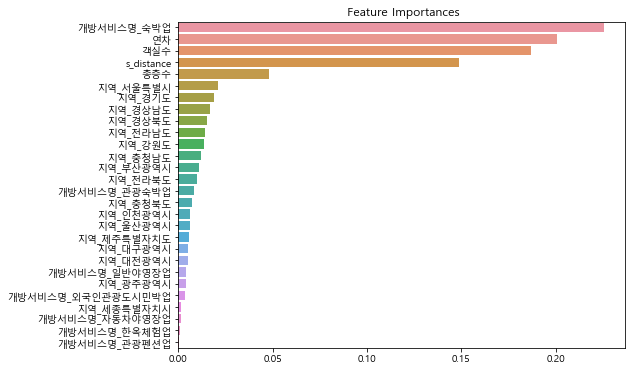

In [92]:
ftr_importances_values = forest.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train_19.columns)
ftr_top = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title(' Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [93]:
ftr_sec = pd.DataFrame(ftr_top)
ftr_sec.to_excel('C:/Users/sgvin/Desktop/개인2/대학/동아리/경진대회/2022 1회 경진대회/논문/feature_importances_list.xlsx')

In [94]:
ftr_sec

,0
개방서비스명_숙박업,0.225348
연차,0.200650
객실수,0.186957
s_distance,0.148862
총층수,0.048074
지역_서울특별시,0.020742
지역_경기도,0.018743
지역_경상남도,0.016839
지역_경상북도,0.014960
지역_전라남도,0.014164


# 코로나 이후 예측값과 실제값 비교

In [95]:
y_data_2020.value_counts()

0    31047
1    10233
2       17
Name: 영업상태코드2020, dtype: int64

In [96]:
pd.DataFrame(y_predict_20).value_counts()

0    32106
1     9188
2        3
dtype: int64

In [97]:
y_data_2021.value_counts()

0    31077
1    11550
2       96
Name: 영업상태코드2021, dtype: int64

In [98]:
pd.DataFrame(y_predict_21).value_counts()

0    33556
1     9162
2        5
dtype: int64

# 시각화
-  전처리 이후 생성된 데이터를 사용하여 한꺼번에 시각화 진행

In [89]:
v_data_19 = df2019
v_data_19['영업상태명2019'] = df2019['영업상태명2019']

v_data_20 = df2020
v_data_20['영업상태명2020'] = df2020['영업상태명2020']

v_data_21 = df2021

In [90]:
v_data_20.isnull().sum()

Unnamed: 0    0
개방서비스명        0
인허가일자         0
영업상태구분코드      0
폐업일자          0
휴업시작일자        0
휴업종료일자        0
총층수           0
객실수           0
경도            0
위도            0
지역            0
s_distance    0
영업상태명2020     0
연차            0
dtype: int64

In [91]:
v_data_19.to_excel('숙박업_19.xlsx')
v_data_20.to_excel('숙박업_20.xlsx')
df2021.to_excel('숙박업_21.xlsx')

In [92]:
df1 = pd.read_excel('숙박업_21.xlsx')
df2 = pd.read_excel('숙박업_20.xlsx')
df3 = pd.read_excel('숙박업_19.xlsx')

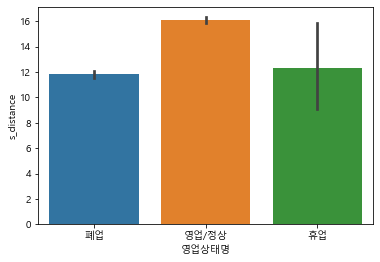

In [93]:
# 영업상태별 역과의 거리
sns.barplot(x=df1.영업상태명,y=df1.s_distance)
plt.show()

In [94]:
df1_1=df1[df1['영업상태명']=='영업/정상']
df1_2=df1[df1['영업상태명']=='폐업']
df1_3=df1[df1['영업상태명']=='휴업']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


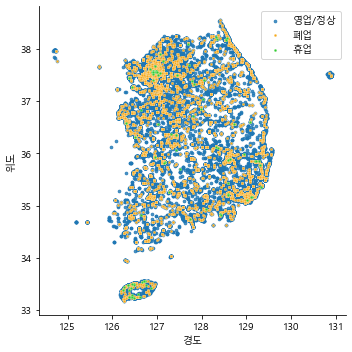

In [95]:
#지역별 숙박업 현황 파악
sns.lmplot('경도','위도', data=df1, fit_reg=False, scatter_kws={'s':7})
sns.scatterplot(x=df1_2.경도, y=df1_2.위도, s=7, color='#F7A919')
sns.scatterplot(x=df1_3.경도, y=df1_3.위도, s=7, color='#32CD32')
plt.legend(labels=["영업/정상","폐업",'휴업'])
plt.show()

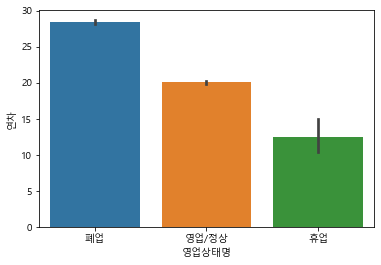

In [96]:
#영업현황에 따른 연차 파악
sns.barplot(x=df1.영업상태명,y=df1.연차)
plt.show()

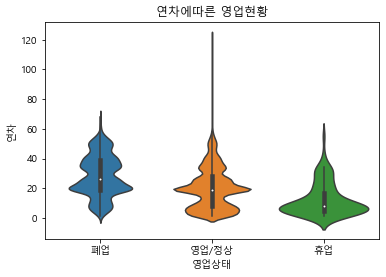

In [97]:
# 연차에 따른 영업상태 바이올린플랏
ax1 = sns.violinplot(x=df1.영업상태명,y=df1.연차)
ax1.set_title('연차에따른 영업현황')
ax1.set_xlabel('영업상태')
ax1.set_ylabel('연차')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


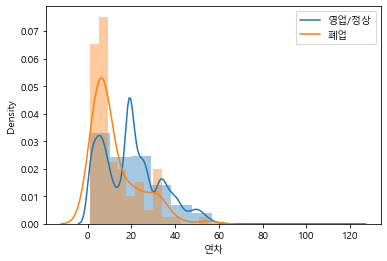

In [98]:
#연차별 영업상태 히스토그램
sns.distplot(df1[df1['영업상태구분코드']==1]['연차'],kde=True,hist=True,bins=13) 
sns.distplot(df1[df1['영업상태구분코드']==2]['연차'],kde=True,hist=True,bins=13) 
plt.legend(labels=["영업/정상","폐업"])
plt.show()